Loading and Understanding the data
 Import the data.

 Analyze the dimensions of the data.

 Visualize the data.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
images_path = "../data/flowers.zip"

In [3]:
from zipfile import ZipFile
with ZipFile(images_path,'r') as zip:
  zip.extractall()

In [4]:
!ls flowers

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import os
import cv2

dataset = './flowers'
X = []
y = []
labels = []

# list all folders inside train directory
for i in os.listdir(dataset):
    print(i)
    if i!= '.DS_Store':   #Specific to Mac
      labels.append(i)        
      for j in os.listdir(os.path.join(dataset, i)):
        # read each image inside train directory one by one
        dummy = cv2.imread(os.path.join(dataset, i, j))
        dummy = cv2.resize(dummy, (128, 128))   # Resizing can be any number - 128 is just kept for standard reference
        X.append(dummy)
        y.append(i)

daisy
dandelion
rose
sunflower
tulip


[1546 3359  872 1008 4016 3049 4194 3435 2825  488]


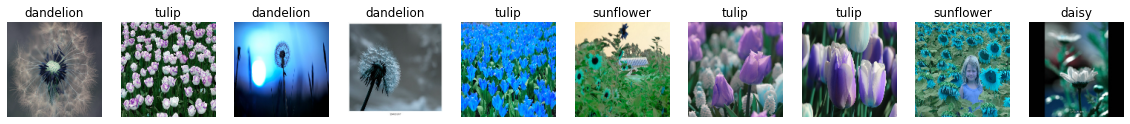

In [6]:
rand = np.random.randint(0, len(X), 10) # Generating 10 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 15))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

2. Data Preparation

 Split the dataset into train and validation. (suggestion: keep the test folder for final validation)

 One hot encode the target variable.

 Normalize the data.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print(len(X_train))
print(len(X_test))


3021
1296


In [8]:
## One hot encode the target variable
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

## Convert data from list to array
X_train = np.array(X_train)
X_test = np.array(X_test)

In [9]:
Y_train = pd.get_dummies(y_train).values

In [10]:
Y_test = pd.get_dummies(y_test).values

In [11]:
## Normalization
X_train = X_train.astype('float32')
X_train = X_train.reshape(X_train.shape[0],128,128,3)
X_train = X_train / 255.

X_val = X_test.astype('float32')
X_val = X_test.reshape(X_val.shape[0], 128,128,3)
X_val = X_test / 255.

In [12]:
## Check the min and max values after normalization
print('Train data------------','max:',X_train.max(), 'min:',X_train.min())
print('Validation data-------','max:',X_val.max(), 'min:',X_val.min())

Train data------------ max: 1.0 min: 0.0
Validation data------- max: 1.0 min: 0.0


In [13]:
# DATA SET SHAPE AND SIZE
print('\nTraining data : ', X_train.shape, y_train.shape)  # TRAIN
print('\nValidation data : ', X_val.shape, y_test.shape)       # Validation


Training data :  (3021, 128, 128, 3) (3021, 5)

Validation data :  (1296, 128, 128, 3) (1296, 5)


3. Train, tune, test, and Compare Deep Learning image classifier model using: [

 Use CNN for Training.

In [14]:
## Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

In [15]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))
# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 128 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))
# Adding dropout with probability 0.4
classifier.add(Dropout(0.4))

# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))

# The final output layer with 5 neuron to predict the categorical classification
classifier.add(Dense(units = 5, activation = 'softmax'))

Compiling the CNN classifier with Adam optimizer (default Learning rate and other parameters) and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [16]:
## Complie the model and get the summary of the model architecture
opt = Adam()
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

In [17]:
## Fit the model
cnn_model_1 = classifier.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_test), initial_epoch=0)

Epoch 1/10
78/95 [=======================>......] - ETA: 11s - loss: 1.3852 - accuracy: 0.3898

KeyboardInterrupt: 

In [ ]:
# Accuracy and Loss plots 

EPOCH=10
epochs = range(1,EPOCH+1)

loss_train = cnn_model_1.history['loss']
loss_val = cnn_model_1.history['val_loss']
Acc_train = cnn_model_1.history['accuracy']
Acc_val = cnn_model_1.history['val_accuracy']

# Loss Vs Epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Vs Epochs
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

CNN Classifier 2: Adding few more layers with Batch normalization and dropout to check if we can mitigate the problem of overfitting, and observing the model performance for more number of epochs

In [ ]:
# model architecture building

Classifier_2 = Sequential()

Classifier_2.add(Convolution2D(32, (3,3), padding='same', activation='relu', input_shape=(128,128,3)))
Classifier_2.add(BatchNormalization())

Classifier_2.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
Classifier_2.add(BatchNormalization())
Classifier_2.add(MaxPooling2D(pool_size=(2,2)))
Classifier_2.add(Dropout(0.3))

Classifier_2.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
Classifier_2.add(BatchNormalization())

Classifier_2.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
Classifier_2.add(BatchNormalization())
Classifier_2.add(MaxPooling2D(pool_size=(2,2)))
Classifier_2.add(Dropout(0.5))

Classifier_2.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
Classifier_2.add(BatchNormalization())

Classifier_2.add(Convolution2D(256, (3,3), padding='same', activation='relu'))
Classifier_2.add(BatchNormalization())
Classifier_2.add(MaxPooling2D(pool_size=(2,2)))
Classifier_2.add(Dropout(0.5))

Classifier_2.add(Flatten())

# fully connected layer
Classifier_2.add(Dense(128, activation='relu'))
Classifier_2.add(BatchNormalization())
Classifier_2.add(Dropout(0.5))

# Classification layer
Classifier_2.add(Dense(units=5, activation='softmax'))   

In [ ]:
## Complie the model and get the summary of the model architecture
opt = Adam()
Classifier_2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
Classifier_2.summary()

In [ ]:
## Fit the model
cnn_model_2 = Classifier_2.fit(X_train, y_train, epochs = 30, validation_data = (X_val, y_test), initial_epoch=0)

In [ ]:
7# Accuracy and Loss plots 

EPOCH=30
epochs = range(1,EPOCH+1)

loss_train = cnn_model_2.history['loss']
loss_val = cnn_model_2.history['val_loss']
Acc_train = cnn_model_2.history['accuracy']
Acc_val = cnn_model_2.history['val_accuracy']

# Loss Vs Epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Vs Epochs
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

 Use various CNN with transferred learning models for training.

VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model

base_model = VGG16(input_shape=(128,128,3),
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x) #dense layer 3
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
preds = Dense(5, activation='softmax')(x) #final layer with sigmoid activation

model_vgg16 = Model(inputs=base_model.input, outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg16.layers[:20]:
    layer.trainable=False
for layer in model_vgg16.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_vgg16.summary()

In [ ]:
vgg16_history = model_vgg16.fit(x=X_train, y=y_train, batch_size=64, epochs=50, validation_data=(X_val, y_test))

In [ ]:
## Accuracy and Loss plots

accuracy = vgg16_history.history['accuracy']
val_accuracy = vgg16_history.history['val_accuracy']
loss = vgg16_history.history['loss']
val_loss = vgg16_history.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy')
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')
plt.show()

VGG19

In [ ]:
import tensorflow
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model

base_model = VGG19(input_shape=X_train[0].shape,
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_vgg19 = Model(inputs=base_model.input,
                    outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg19.layers[:20]:
    layer.trainable=False
for layer in model_vgg19.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg19.compile(optimizer=tensorflow.optimizers.Adam(learning_rate=1e-5), ## Modify Learning rate
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg19.summary()

In [ ]:
vgg19_history = model_vgg19.fit(x=X_train, y=y_train, batch_size=32, epochs=50, validation_data=(X_val, y_test))

In [ ]:
## Accuracy and Loss plots

accuracy = vgg19_history.history['accuracy']
val_accuracy = vgg19_history.history['val_accuracy']
loss = vgg19_history.history['loss']
val_loss = vgg19_history.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy')
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')
plt.show()

In [ ]:
# Saving the best performing model and its weights for future use
model_vgg19.save('vgg19.h5')
model_vgg19.save_weights('vgg19_weights.h5')

 Compare the results from the above steps and write your detailed observations.

Classifier 1 & 2: A basic CNN model and a CNN model with a batchnormalization and dropout layers, we can observe that the models are doing very good at training, but when it comes to testing the model there is a high difference in the loss and accuracy, which we can say that these two models are highly overfitted.
Classifier 3: Using Pretrained Model VGG16, compare to the first two models the trainable parameters in this model has reduced drastically, and also the overfitting has reduced to some extend, but we can say that VGG16 is also overfitted.
Classifier 4: Using Pretrained Model VGG19, we added a learning rate, and reduced the batch size to 32 and observed the model performance till 50 number of epochs, and we were able to achieve a balanced results above ~80% for train and test, mitigated the problem overfitting.

 Load the best fitted model and make the predictions on a test image.

In [ ]:
## Load the best fitted model

from tensorflow.keras.models import load_model

# Loading VGG16
model_vgg19 = load_model('vgg19.h5')

In [ ]:
plt.figure(figsize=[2, 2])

img_path='/content/flowers/rose/16525204061_9b47be3726_m.jpg'

test_image = cv2.imread(img_path)

plt.imshow(test_image)

# Resize the image to 128X128 shape to be compatible with the model
test_image = cv2.resize(test_image,(128,128))

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image*1/255.0

# Predict the result of the test image
y_pred = model_vgg19.predict(test_image)
print('\n')
print("Softmax Outputs:",y_pred)

# Convert the predicted probabilities to labels
labels = ['daisy', 'dandelion', 'rose',  'sunflower',  'tulip'] ## This is the order in which the dataset is read
for i in y_pred:
    for j, k in enumerate(i):
        if k == y_pred.max():
            print('\n')
            print('Predicted_Label:', labels[j])

In [ ]:
np.argmax(y_pred)